In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

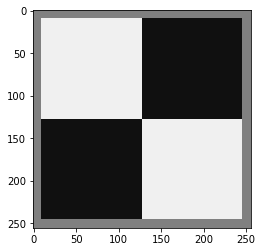

In [2]:
img = cv2.imread('input/ps1-input0.png')
plt.imshow(img, cmap='gray')

### Question 1

True

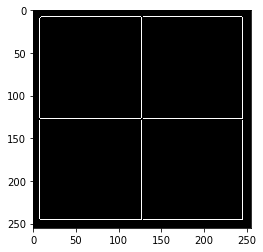

In [3]:
img_edges = cv2.Canny(img, 100, 200)
plt.imshow(img_edges, 'gray')
# Somehow here the axis set default to -0.5 to 255.5, which makes top and right edge gone.
# So enforce the xlim and ylim to 0 to 255.
axes = plt.gca()
axes.set_xlim([0,255])
axes.set_ylim([255,0])
cv2.imwrite('output/ps1-1-a-1.png', img_edges)

### Question 2

#### hough_lines_acc function

In [4]:
def hough_lines_acc(img_edges, theta_list=np.linspace(-89, 90, 180), rho_res=1):
    height, width = img_edges.shape
    rho_max = sqrt(height**2 + width**2)
    rho_list = np.array(range(0, int(ceil(rho_max)), rho_res))
    H = np.zeros((len(rho_list), len(theta_list)))
    edges = np.nonzero(img_edges)

    for row, col in zip(*edges):
        for theta_idx, theta in enumerate(theta_list):
            rho = col * cos(theta * pi / 180) + row * sin(theta * pi / 180)
            rho_idx = int(round(rho))
            H[rho_idx, theta_idx] += 1
    return H, theta_list, rho_list

True

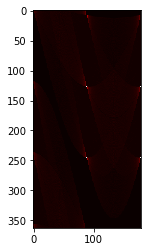

In [5]:
H, theta, rho = hough_lines_acc(img_edges)
Hnorm = H/(np.amax(H)) * 255  # Normalize
plt.imshow(Hnorm, 'hot')
cv2.imwrite('output/ps1-2-a-1.png', Hnorm)

##### hough_peaks function

In [6]:
def hough_peaks(H, numpeaks=10, nhood_size=5):
    peaks = np.zeros((numpeaks,2), dtype=np.uint64)
    Hc = H.copy()

    for i in range(numpeaks):
        max_idx = np.argmax(Hc)
        row, col = np.unravel_index([max_idx], Hc.shape)
        peaks[i,:] = [row, col]
        t = nhood_size//2
        Hc[int(max(0, row-t)):int(row+t+1), int(max(0, col-t)):int(col+t+1)] = 0

    return peaks

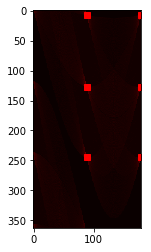

In [7]:
peaks = hough_peaks(Hnorm, 6)
fig = plt.figure()
plt.imshow(Hnorm, 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'rs')

#### hough_lines_draw function

In [8]:
# http://answers.opencv.org/question/21132/draw-the-lines-detected-by-cvhoughlines/
# http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html
def hough_lines_draw(img, outfile, peaks, rhos, thetas):
    for peak in peaks:
        rho = rhos[peak[0]]
        theta = thetas[peak[1]] * np.pi / 180.0
        a = np.cos(theta); b = np.sin(theta)
        pt0 = rho * np.array([a,b])
        pt1 = tuple((pt0 + 1000 * np.array([-b,a])).astype(int))
        pt2 = tuple((pt0 - 1000 * np.array([-b,a])).astype(int))
        cv2.line(img, pt1, pt2, (0,255,0), 2)
    cv2.imwrite(outfile, img)
    return img

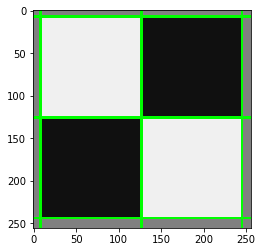

In [9]:
plt.imshow(hough_lines_draw(img, 'output/ps1-2-c-1.png', peaks, rho, theta))

### Question 3

True

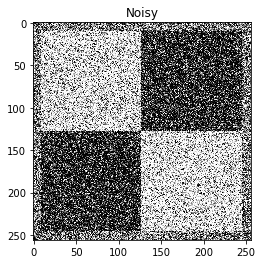

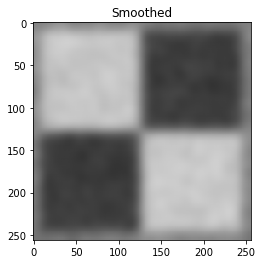

In [10]:
img_noisy = cv2.imread('input/ps1-input0-noise.png')
img_smoothed = cv2.GaussianBlur(img_noisy, (41, 41), 0)
plt.figure()
plt.imshow(img_noisy)
plt.title('Noisy')
plt.figure()
plt.imshow(img_smoothed)
plt.title('Smoothed')
cv2.imwrite('output/ps1-3-a-1.png', img_smoothed)

True

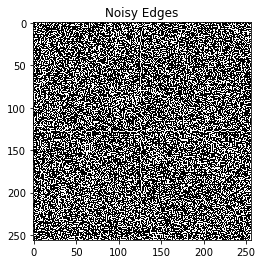

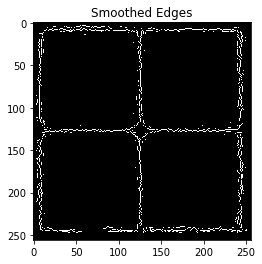

In [11]:
img_noisy_edges = cv2.Canny(img_noisy, 100, 200)
img_smoothed_edges = cv2.Canny(img_smoothed, 10, 30)
plt.figure()
plt.imshow(img_noisy_edges, 'gray')
plt.title('Noisy Edges')
plt.figure()
plt.imshow(img_smoothed_edges, 'gray')
plt.title('Smoothed Edges')
cv2.imwrite('output/ps1-3-b-1.png', img_noisy_edges)
cv2.imwrite('output/ps1-3-b-2.png', img_smoothed_edges)

True

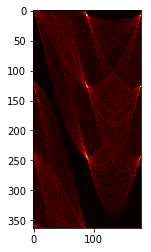

In [12]:
H, theta, rho = hough_lines_acc(img_smoothed_edges)
Hnorm = H/(np.amax(H)) * 255  # Normalize
plt.figure()
plt.imshow(Hnorm, 'hot')
cv2.imwrite('output/ps1-2-a-1.png', Hnorm)

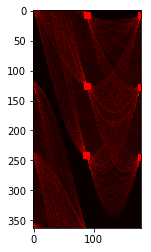

In [13]:
peaks = hough_peaks(Hnorm, 6, 11)
fig = plt.figure()
plt.imshow(Hnorm, 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'rs')
fig.savefig('output/ps1-3-c-1.png')

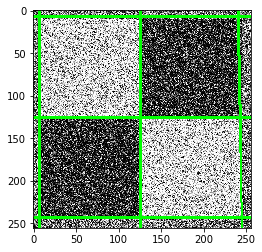

In [14]:
plt.imshow(hough_lines_draw(img_noisy, 'output/ps1-3-c-2.png', peaks, rho, theta))

### Question 4

True

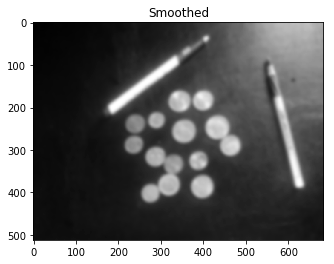

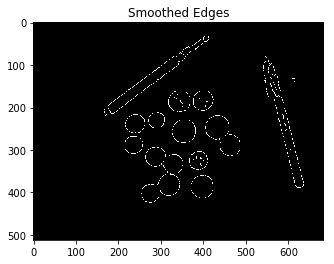

In [43]:
circle1 = cv2.imread('input/ps1-input1.png')
circle1_smoothed = cv2.GaussianBlur(cv2.cvtColor(circle1, cv2.COLOR_BGR2GRAY), (21, 21), 0)
plt.figure()
plt.imshow(circle1_smoothed, 'gray')
plt.title('Smoothed')
cv2.imwrite('output/ps1-4-a-1.png', circle1_smoothed)

circle1_smoothed_edges = cv2.Canny(circle1_smoothed, 5, 40)
plt.figure()
plt.imshow(circle1_smoothed_edges, 'gray')
plt.title('Smoothed Edges')
cv2.imwrite('output/ps1-4-b-1.png', circle1_smoothed_edges)

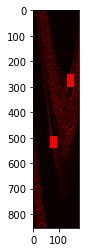

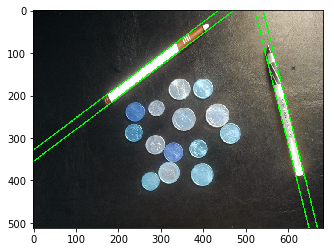

In [44]:
H, theta, rho = hough_lines_acc(circle1_smoothed_edges)
Hnorm = H/(np.amax(H)) * 255  # Normalize
peaks = hough_peaks(Hnorm, 4, 15)
fig = plt.figure()
plt.imshow(Hnorm, 'hot')
plt.plot(peaks[:,1], peaks[:,0], 'rs')
fig.savefig('output/ps1-4-c-1.png')
fig = plt.figure()
plt.imshow(hough_lines_draw(circle1, 'output/ps1-4-c-2.png', peaks, rho, theta))

####  hough_circles_acc function

In [ ]:
def hough_circles_acc(img, radius):